# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_results_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
metadata_results_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
mouse_count = metadata_results_combined["Mouse ID"].nunique()
mouse_count

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = metadata_results_combined[metadata_results_combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

print(duplicates)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
all_duplicate_data = metadata_results_combined[metadata_results_combined["Mouse ID"].isin(duplicate_mouse_ids)]

print("All data for duplicate Mouse IDs:")
print(all_duplicate_data)

All data for duplicate Mouse IDs:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989     

In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = metadata_results_combined[metadata_results_combined["Mouse ID"] !="g989"]

print("Clean DataFrame after dropping duplicate:")
print(clean_df.head())

Clean DataFrame after dropping duplicate:
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [31]:
# Checking the number of mice in the clean DataFrame.
count_mouse = clean_df["Mouse ID"].nunique()
count_mouse

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std_err = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std_dev,
    "Tumor Volume Std. Err.": tumor_std_err
})

print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
statistical_summary = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
   mean="mean", median="median", variance="var", std_dev="std", std_err="sem"
)
statistical_summary

,mean,median,variance,std_dev,std_err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

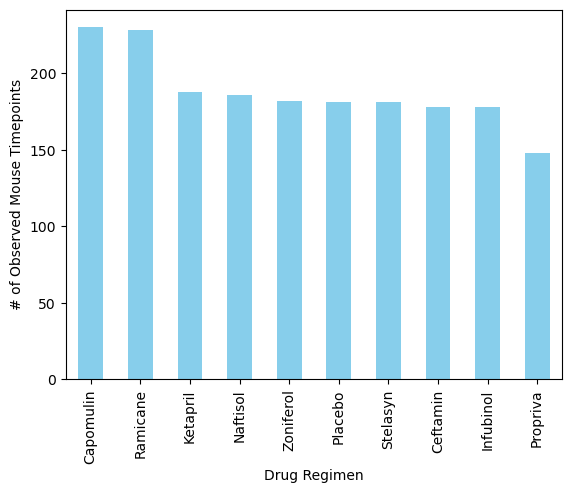

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_count = clean_df.groupby("Drug Regimen")["Timepoint"].count()

timepoint_count_sorted = timepoint_count.sort_values(ascending=False)

timepoint_count_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

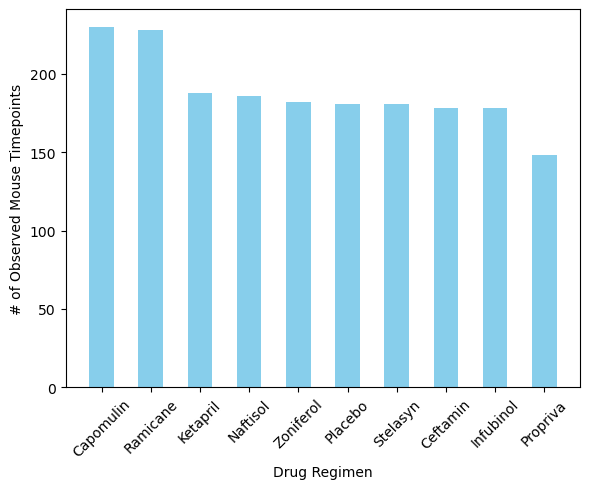

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(6, 5))
bar_width = 0.5 

plt.bar(timepoint_count_sorted.index, timepoint_count_sorted.values, color='skyblue', width=bar_width)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

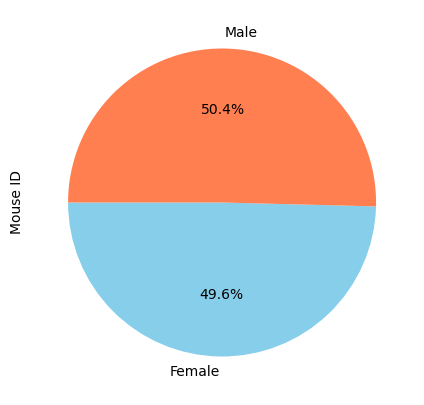

In [68]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_df.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
plt.figure(figsize=(5, 5))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=180, colors=["skyblue", "coral"], labels=gender_counts.index)
plt.show()

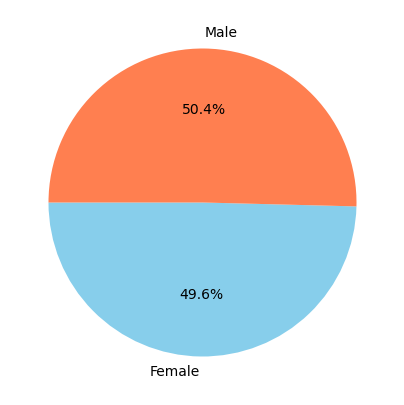

In [67]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.figure(figsize=(5, 5))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct="%1.1f%%", 
    startangle=180, 
    colors=["skyblue", "coral"]
)
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_regimens_df = clean_df[clean_df["Drug Regimen"].isin(four_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_regimens_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint, clean_df, on=["Mouse ID", "Timepoint"], how="left")

# Display the final tumor volume DataFrame
print(final_tumor_df.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a275         45           62.999356                 3     Ceftamin   
3     a411         45           38.407618                 1     Ramicane   
4     a444         45           43.047543                 0     Ramicane   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female          20          28  
3    Male           3          22  
4  Female          10          25  


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {}

# Loop through each treatment
for drug in four_regimens:
    # Get tumor volumes for mice treated with the drug
    drug_data = final_tumor_df[final_tumor_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volumes[drug] = drug_data

    # Calculate the IQR
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1 
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify any potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    # Print the summary for each drug
    print(f"{drug}'s potential outliers: {outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


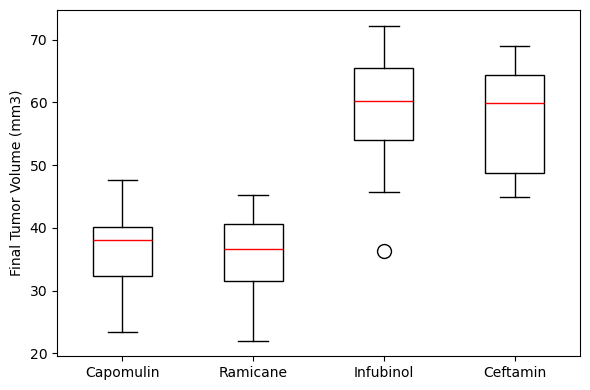

In [88]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

tumor_volumes = [final_tumor_df[final_tumor_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"] for drug in four_regimens]
assert len(tumor_volumes) == len(four_regimens), "Mismatch between data and labels."

plt.figure(figsize=(6, 4))
plt.boxplot(
    tumor_volumes, 
    labels=four_regimens, 
    patch_artist=True, 
    boxprops=dict(facecolor="white", color="black"), 
    medianprops=dict(color="red"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),    
    flierprops=dict(marker="o", color="red", markersize=10)
)
# Add title and labels
plt.ylabel("Final Tumor Volume (mm3)")


# Show the plot
plt.tight_layout()

## Line and Scatter Plots

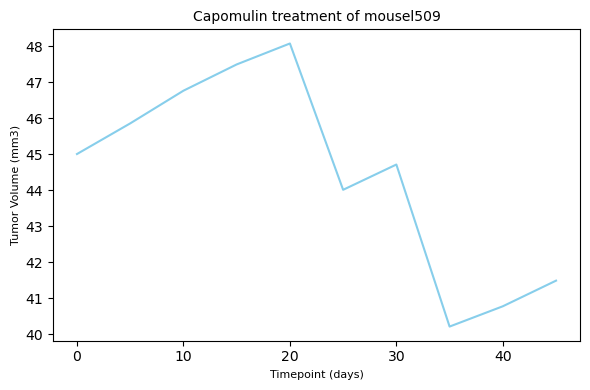

In [100]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
the_mouse = "l509"  

# Filter the data for the selected mouse treated with Capomulin
mouse_data = clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == the_mouse)]

# Sort the data by time point for proper visualization
mouse_data = mouse_data.sort_values("Timepoint")

# Extract time points and tumor volumes
timepoints = mouse_data["Timepoint"]
mouse_tumor_volumes = mouse_data["Tumor Volume (mm3)"]

# Create the line plot
plt.figure(figsize=(6, 4))
plt.plot(timepoints, mouse_tumor_volumes, linestyle="-", color="skyblue", label=f"Mouse ID: {the_mouse}")

# Add title and labels
plt.title(f"Capomulin treatment of mouse{the_mouse}", fontsize=10)
plt.xlabel("Timepoint (days)", fontsize=8)
plt.ylabel("Tumor Volume (mm3)", fontsize=8)



# Display the plot
plt.tight_layout()
plt.show()

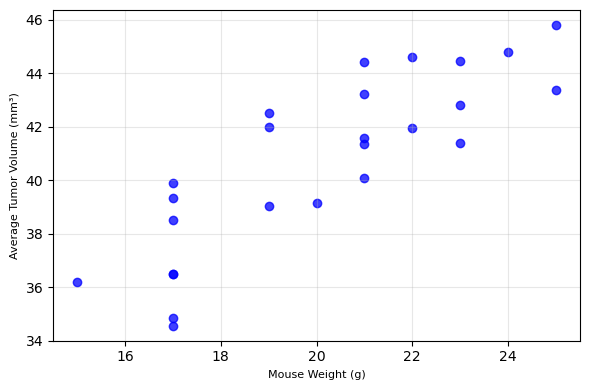

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate the mean tumor volume and weight for each mouse
mouse_avg_data = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Mouse_Weight=("Weight (g)", "mean")
).reset_index()

# Extract mouse weight and average tumor volume
mouse_weights = mouse_avg_data["Mouse_Weight"]
avg_tumor_volumes = mouse_avg_data["Avg_Tumor_Volume"]

# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(mouse_weights, avg_tumor_volumes, color="blue", alpha=0.75)

# Add title and labels
plt.xlabel("Mouse Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm³)", fontsize=8)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


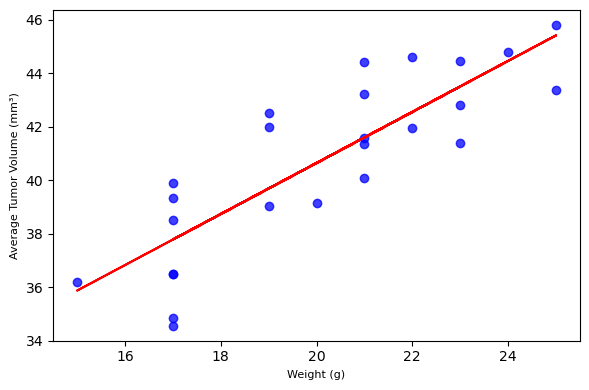

In [107]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the necessary sums for correlation and regression
n = len(mouse_weights)
sum_x = mouse_weights.sum()
sum_y = avg_tumor_volumes.sum()
sum_x_squared = (mouse_weights ** 2).sum()
sum_y_squared = (avg_tumor_volumes ** 2).sum()
sum_xy = (mouse_weights * avg_tumor_volumes).sum()

# Calculate the Pearson correlation coefficient
correlation_coefficient = (n * sum_xy - sum_x * sum_y) / (
    ((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2)) ** 0.5
)

# Calculate the slope (m) and intercept (b) for the regression line
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
intercept = (sum_y - slope * sum_x) / n

# Create the regression line
regression_line = slope * mouse_weights + intercept

# Plot the data and the regression line
plt.figure(figsize=(6, 4))
plt.scatter(mouse_weights, avg_tumor_volumes, color="blue", alpha=0.75, label="Data Points")
plt.plot(mouse_weights, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add title and labels
plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm³)", fontsize=8)

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
# Show the plot
plt.tight_layout()
plt.show()

